# 107. Minimal Network
https://projecteuler.net/problem=107

## Solution
Finding the minimal network that connects the nodes sounds very much like Minimum Spanning Tree (MST) which can be computed using either of Prim's or Kruskal's Algorithm.
It's worth mentioning that minimum spanning tree is implemented in networkx (nx) as minimum_spanning_tree() (and you can specify which algorithm too). However, it's worth exploring how we derived the solution.

Let's start by showing visualising what the input graph looks like in the first place. We read the input (adjacency matrix) and convert that into nx.Graph 

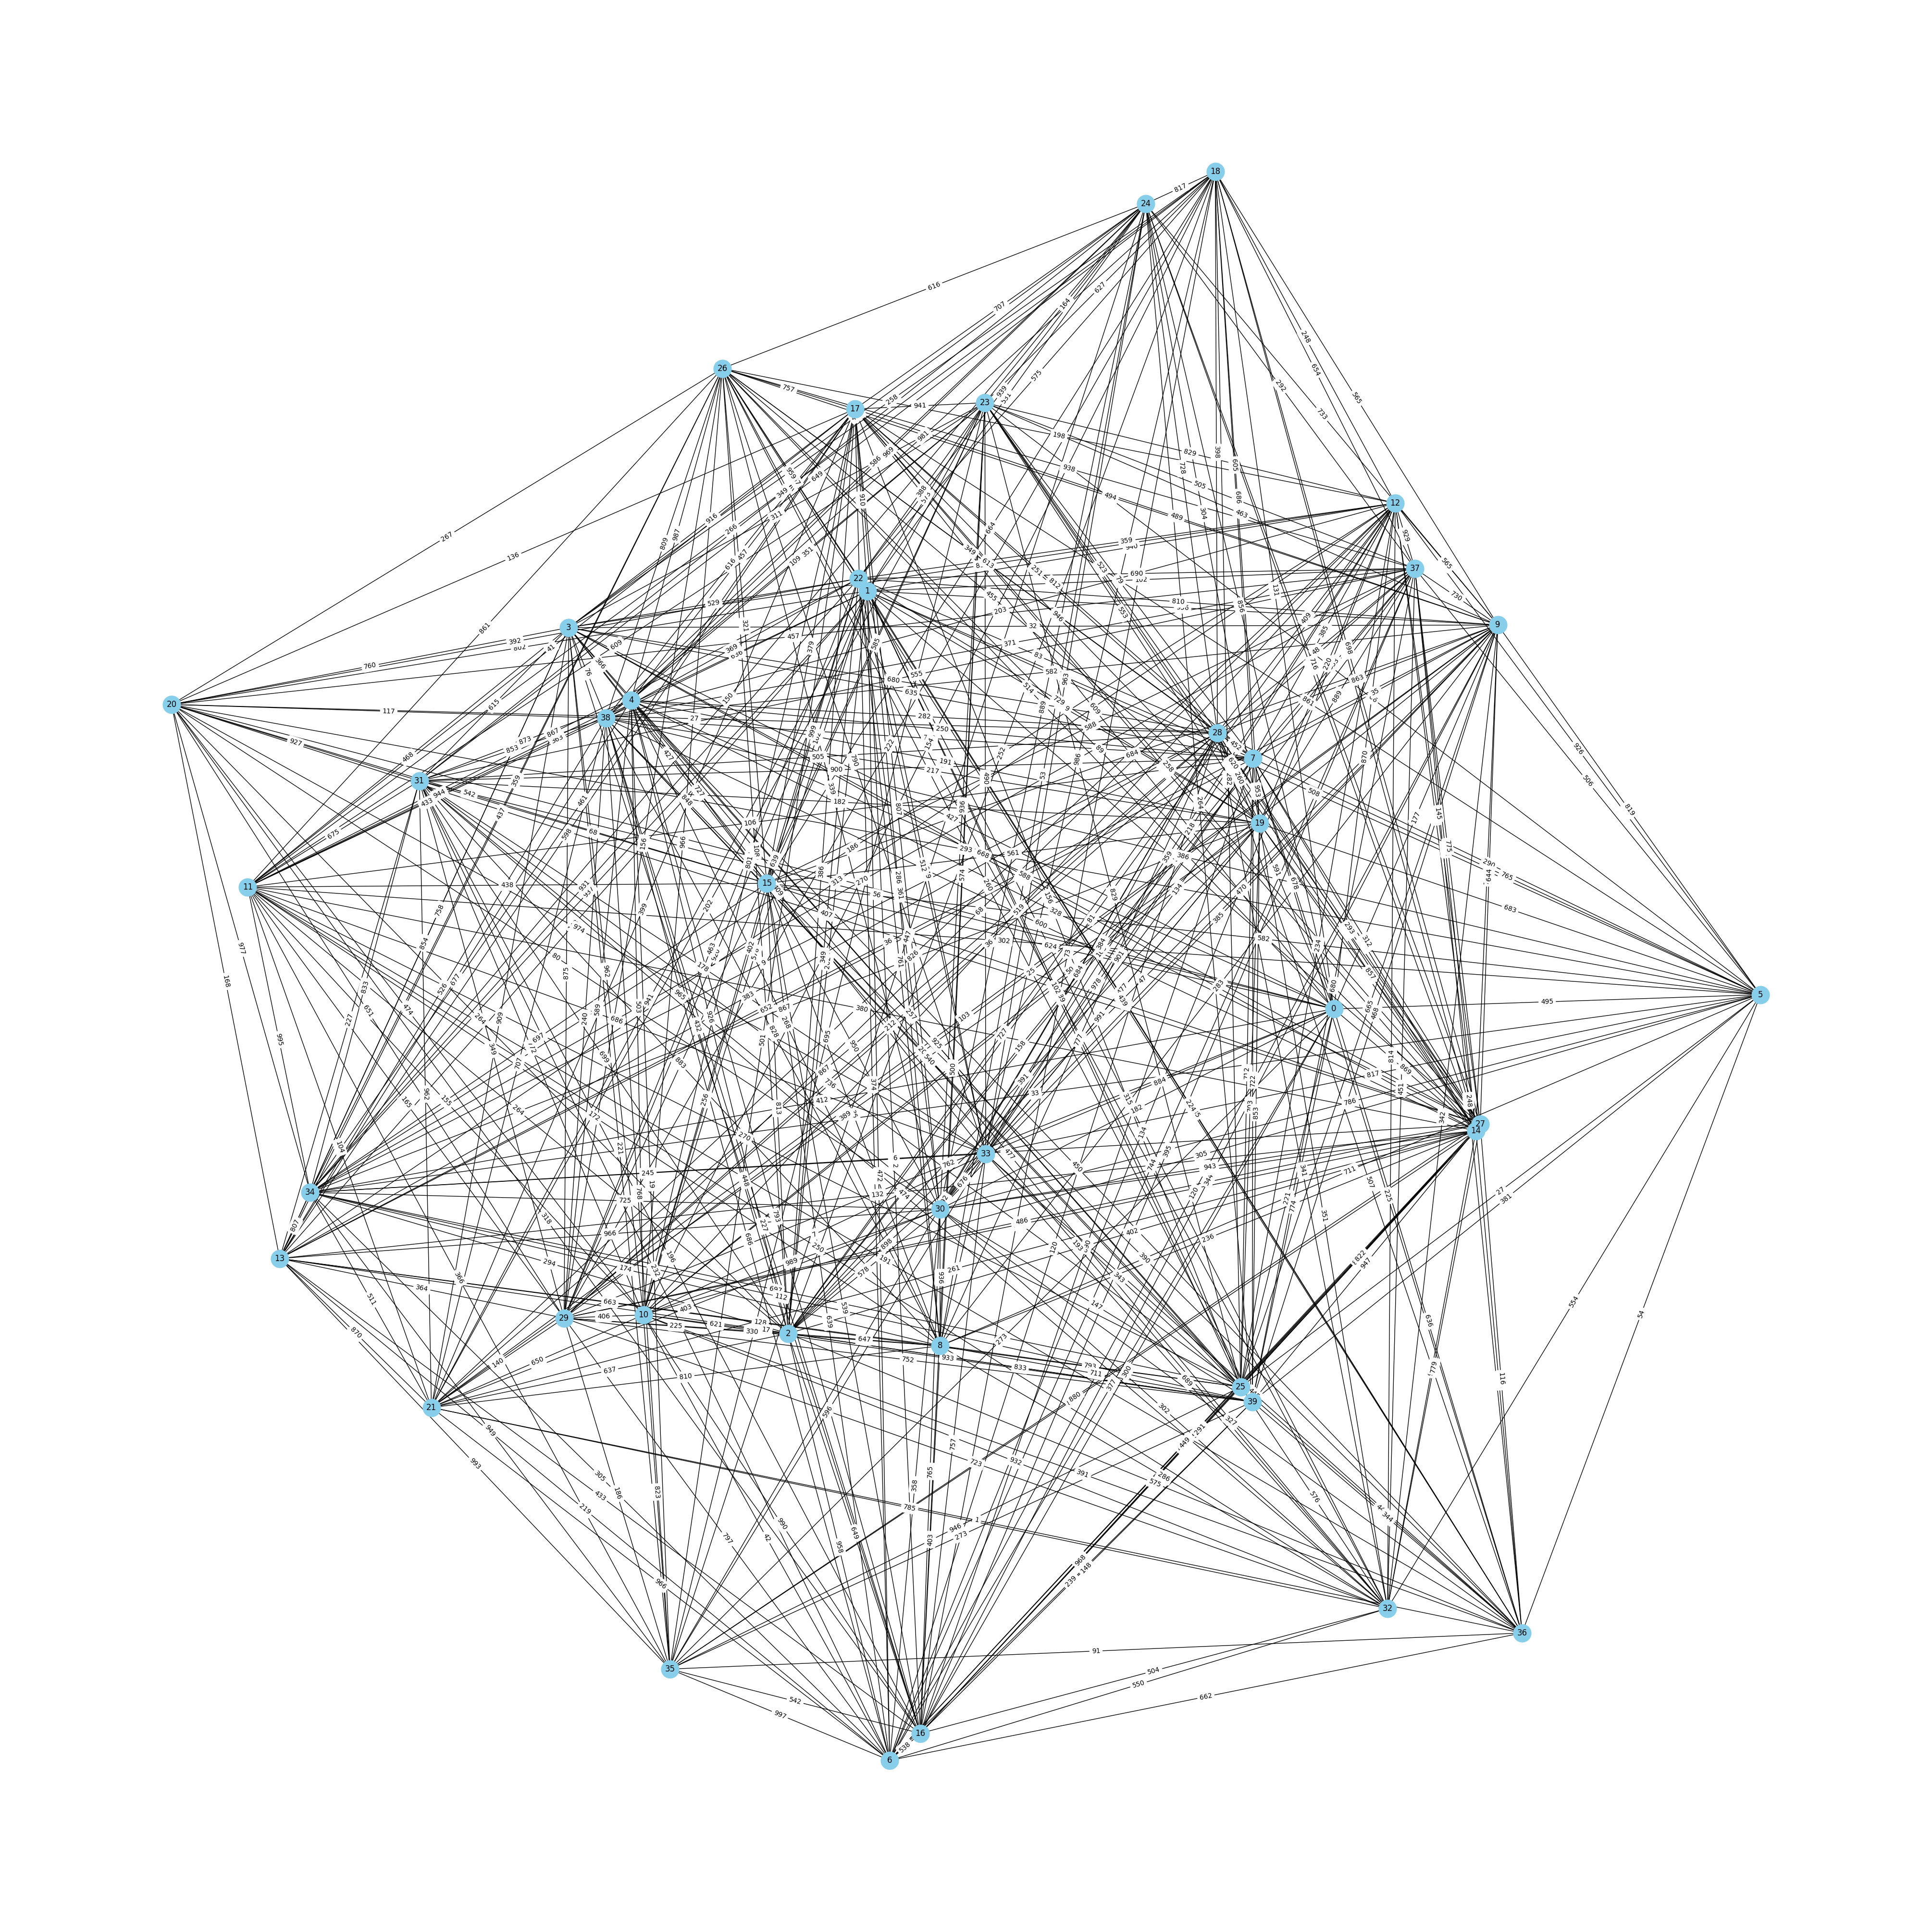

In [1]:
import networkx as nx

from solutions.p107 import p107_graph
from solutions.euler.util.visualise_graph_utils import graph_to_image

graph: nx.Graph = p107_graph()
graph_to_image(graph)

I don't know about you, but that didn't mean a thing to me. I'm going to print out the adjacency matrix in order to visualise it. You can roughly see what they are

In [2]:
import sys
import numpy as np

np.set_printoptions(threshold=sys.maxsize, linewidth=300)
matrix = nx.adjacency_matrix(graph).todense()
print(matrix)

[[  0   0   0 427 668 495 377 678   0 177   0   0 870   0 869 624 300 609 131   0 251   0   0   0 856 221 514   0 591 762 182  56   0 884 412 273 636   0   0 774]
 [  0   0 262   0   0 508 472 799   0 956 578 363 940 143   0 162 122 910   0 729 802 941 922 573 531 539 667 607   0 920   0   0 315 649 937   0 185 102 636 289]
 [  0 262   0   0 926   0 958 158 647  47 621 264  81   0 402 813 649 386 252 391 264 637 349   0   0   0 108   0 727 225 578 699   0 898 294   0 575 168 432 833]
 [427   0   0   0 366   0   0 635   0  32 962 468 893 854 718 427 448 916 258   0 760 909 529 311 404   0   0 588 680 875   0 615   0 409 758 221   0   0  76 257]
 [668   0 926 366   0   0   0 250 268   0 503 944   0 677   0 727 793 457 981 191   0   0   0 351 969 925 987 328 282 589   0 873 477   0   0  19 450   0   0   0]
 [495 508   0   0   0   0   0 765 711 819 305 302 926   0   0 582   0 861   0 683 293   0   0  66   0  27   0   0 290   0 786   0 554 817  33   0  54 506 386 381]
 [377 472 958   0   0 

It's important to check for any negative values because we are using '-' as empty value (which means there are no negative values in this graph). This might suggest that dtype is too narrow (int8, for example, which is only up until 2^8 = 256, would overflow, and create minus values

In [3]:
from solutions.p107 import NOT_EDGE

assert not np.any(matrix < NOT_EDGE), "dtype might be incorrect"
print('Matrix looks good!')

Matrix looks good!


We can also test prim's algorithm (or also implement kruskal's), but this seems to arrive at the correct solution

In [4]:
from solutions.p107 import prims_algorithm, sum_all_edges

# duplication of solve_q107
mst_graph = prims_algorithm(graph)
difference = sum_all_edges(graph) - sum_all_edges(mst_graph)

print(difference)

259679


Minimum spanning tree would look a lot easeir to visualise (in terms of cpu power and actually looking at the image).
Here it goes

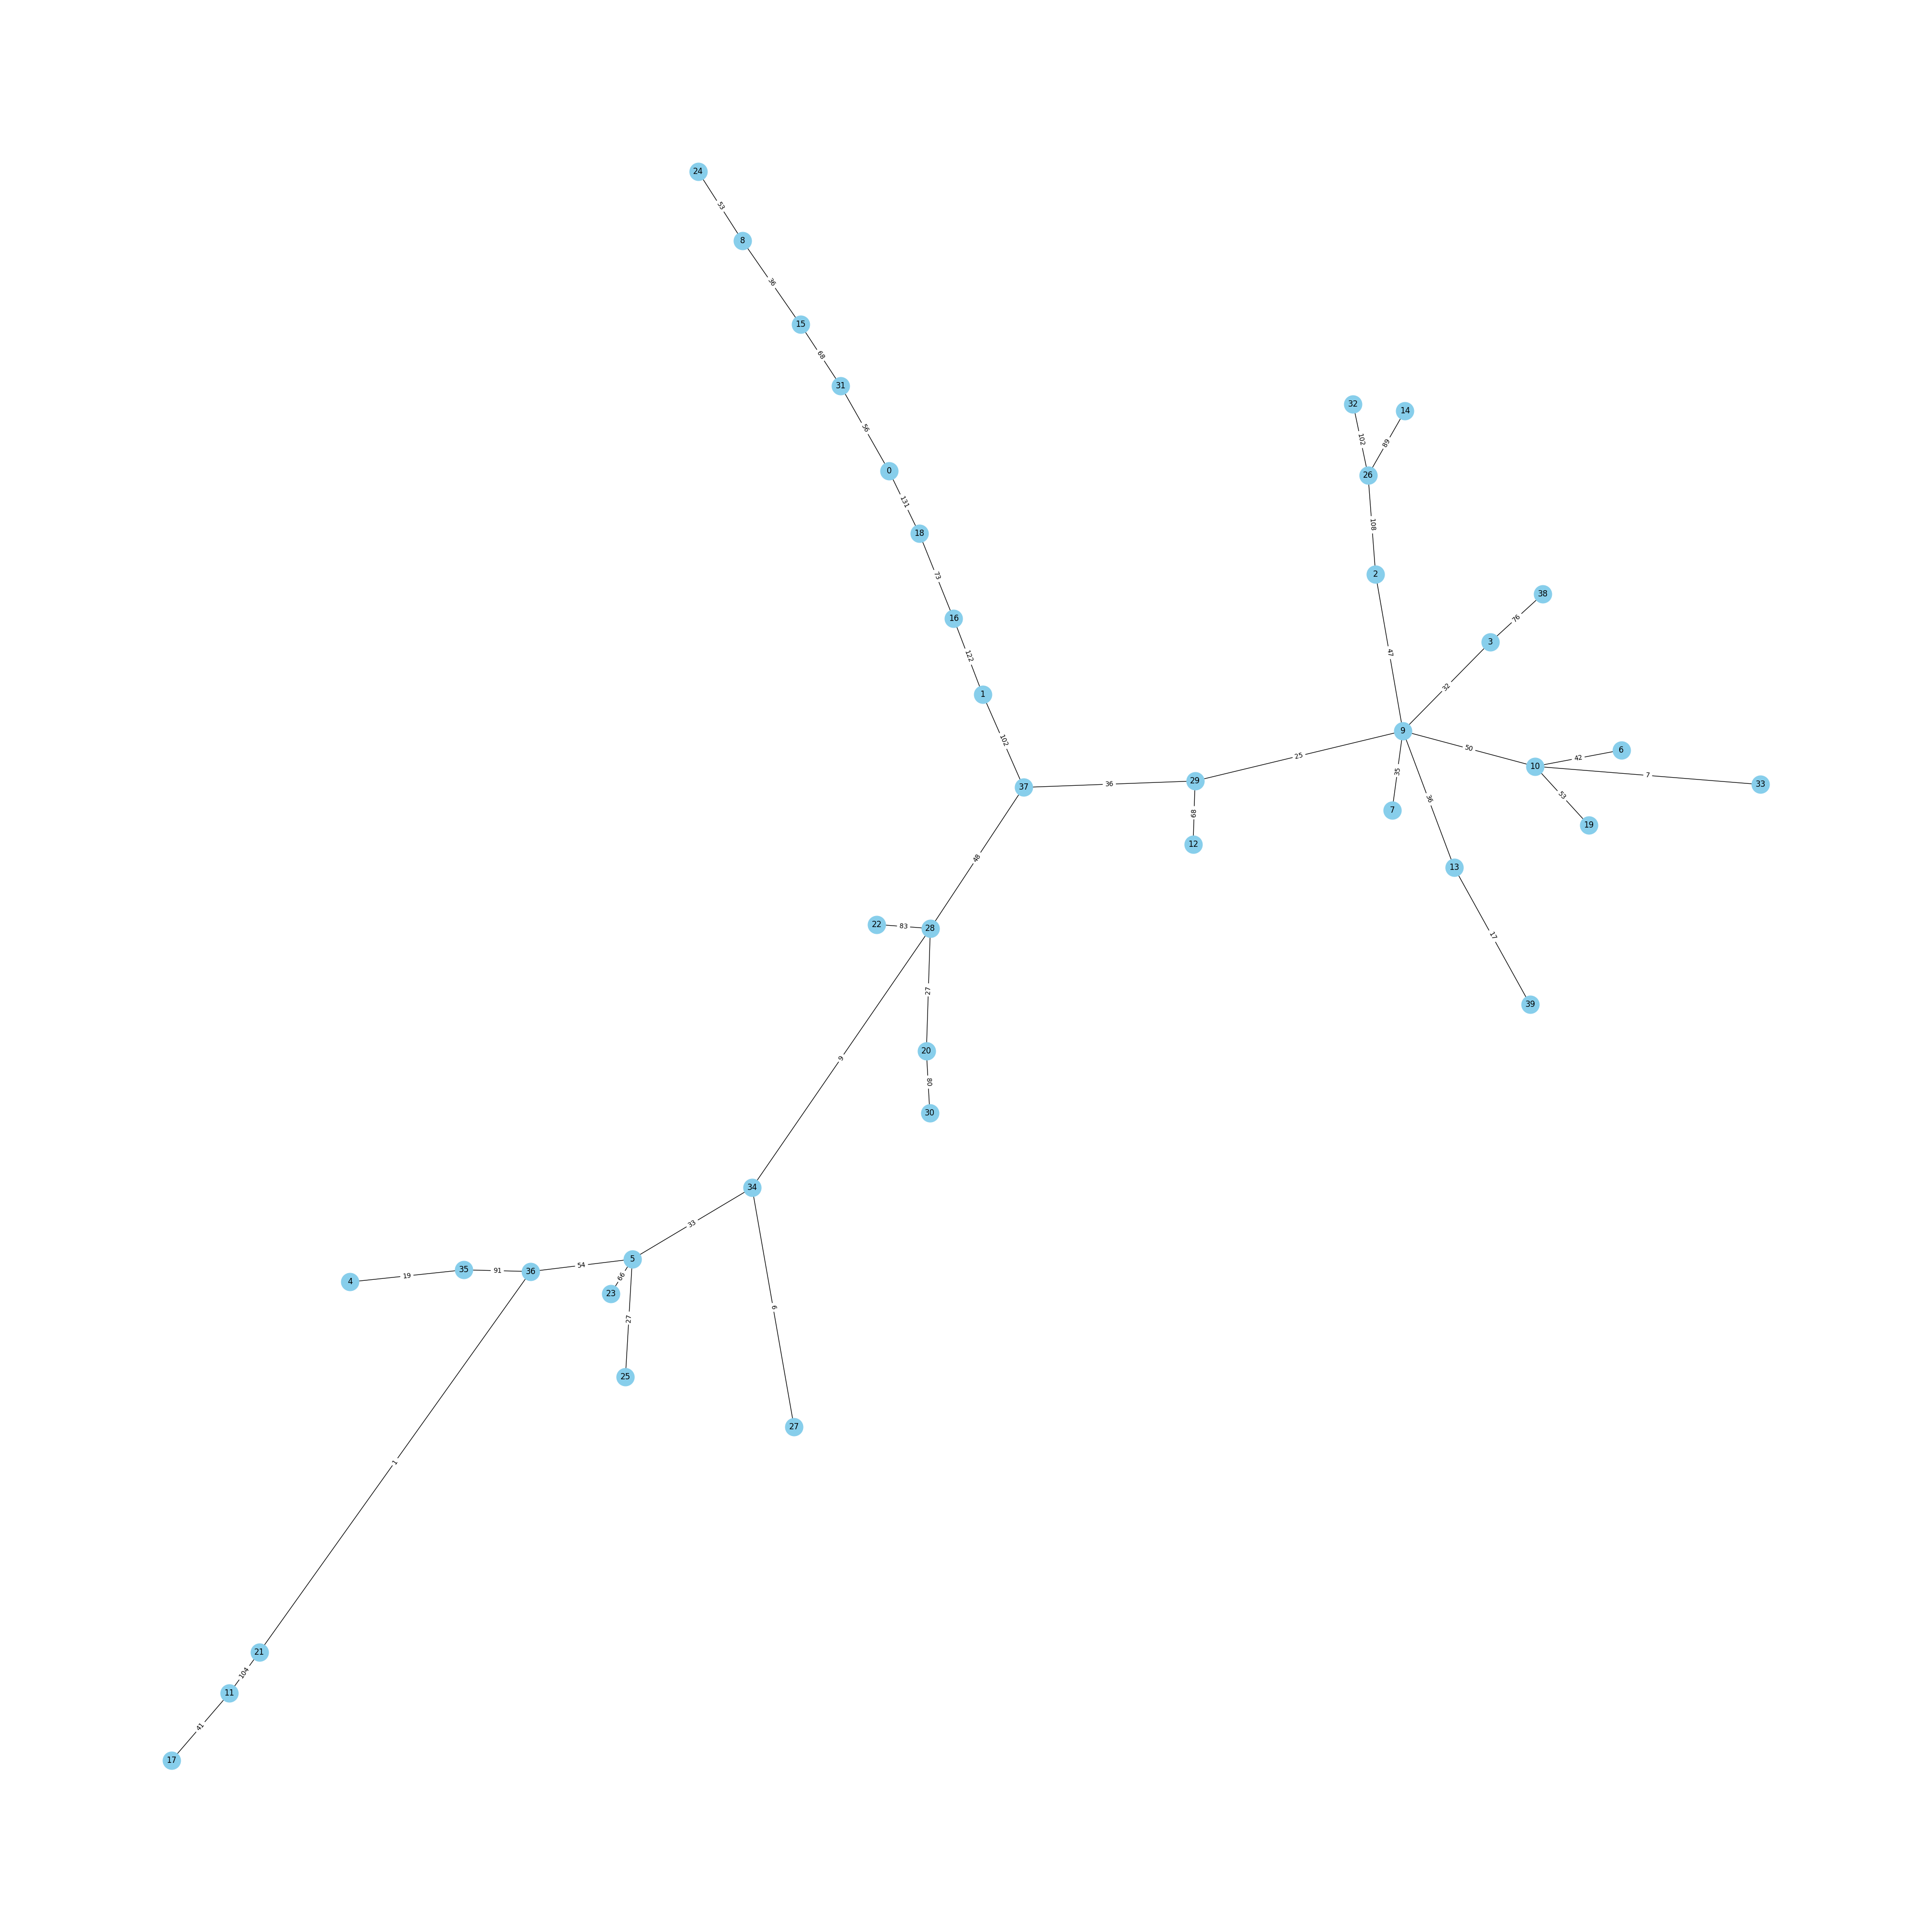

In [5]:
graph_to_image(mst_graph)

## Comparison to networkx implementation
We can find implementation of prim's algorithm by networkx in the link below:
https://github.com/networkx/networkx/blob/984f737bf4e79ae373ffa3b6c7329082806041db/networkx/algorithms/tree/mst.py#L256

It uses heapq to maintain the priority queue instead of using bisect.insort. While they both use binary search, maintaining a heap seems cheaper as we will not traverse through all of the nodes in the priority queue (priority queue being the edges considered for adding to MST). 